In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# **Univariate Linear Regression**

*Introduction*:
This is my first attempt to create a Univariate Linear Regression.
This dataset is the infamous California Housing Dataset and which may not be suited as the ideal for the Univriate study..but well!Let's try this out anyway :)
I would suggest that anyone reading this should select a better dataset,in other words,a dataset that is more suited to the univariate linear regression.
Libraries used:


1.   **NumPy** :Fundamental for scientific computations
2.  ** Pandas** : Provides easy to use data-analysis tools for Python
1.   **Matplotlib** :  Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.



# **Goal** :
To explore the Linear Regression concept from the statistical point of view.
We only use the formula and fetch the result .
The Coherent Learning procedures using Cost Minimization will be uploaded afterwards,as you can check in the repository which I am sure you will.. :)



In [0]:
df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv', sep=',')

**STEP 1: **  
Reading the CSV file from the link directly using the pandas library.
The link is used to read the file but the datset will be uploaded as well.

In [40]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [41]:
df=pd.DataFrame(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


df1=df.set_index('House')
print(df1.head())

**"df.head()" **is a function that displays the first 'n' rows(default n=5) of any dataset.

**STEP 2 :**
As observed the datset is constructed into a pandas **DataFrame** since it is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).All operations within the library of pandas may be performed on it as well.

In [42]:
#shuffling the data
df_1=np.random.permutation(df.index)
df_r=df.reindex(df_1)
x=df_r[['total_rooms']]
x.head()

,total_rooms
10874,435.0
9690,346.0
8968,6106.0
11872,2278.0
8625,7194.0


**STEP 3:** 

Here we randomly reindex and shuffle the data.Such random permutations help to reduce the chances of overfitting ,which is turns out to be a major problem in multivariate models and may be depicted closely in a univariate model as this one.

In [0]:
y=df_r[['population']]

In [44]:
y.head()

,population
10874,219.0
9690,51.0
8968,3246.0
11872,1203.0
8625,3687.0


**STEP 4:**

As observed we now arrange our X and Y variables.
For X variable we have chosen the 'total_rooms' column of data and the 'population' data column acts as the Y variable.

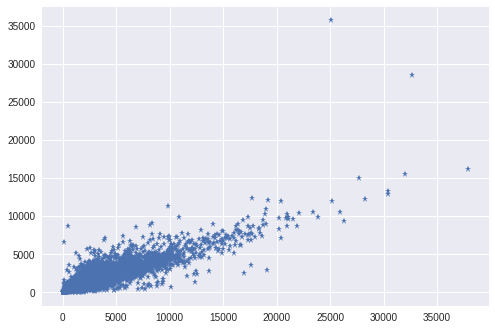

In [45]:
plt.plot(x,y,'*')
plt.show()

**STEP 5:**

Initial plot of the acquired datapoints using the matplotlib function '.plot()'.

**STEP 6:**

We take a close look at the formula that we are trying to implement in this exercise.

![Formula](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2009/11/linearregressionequations.bmp)

We move forward to obtain each element in the formula and implement them in the referred formula to get our regression line.

In [0]:
sum_x=df_r['total_rooms'].sum()
sum_y=df_r['population'].sum()

Summation terms of each data column are gathered using '.sum()' function.

In [47]:
print(sum_x)
print(sum_y)

44942295.0
24302757.0


In [0]:
square_x=np.square(x)
square_y=np.square(y)

Both of the above functions are used to gather the summation of squared terms.
But please you must take not:

![alt text](http://onlinestatbook.com/2/introduction/graphics/sum5.gif)

In [0]:
#print(square_x)
#print(square_y)
prod_xy=df_r['population']*df_r['total_rooms']

Summation of (x(i)*y(i)) terms are geneated.

In [50]:
df_r.shape

(17000, 9)

'shape' function denoted the dimensionality of the DataFrame in question.

In [0]:
n=17000

In [0]:
square_x=square_x.sum()
square_y=square_y.sum()

In [53]:
print(square_x)
print(square_y)

total_rooms    1.995945e+11
dtype: float64
population    5.713990e+10
dtype: float64


In [0]:
prod_xy=prod_xy.sum()

In [55]:
print(prod_xy)

100836449592.0


In [0]:
A=((sum_y*square_x)-(sum_x*prod_xy))/((17000*square_x)-(np.square(sum_x)))

In [0]:
B=((17000*prod_xy)-(sum_x*sum_y))/((17000*square_x)-(np.square(sum_x)))

The Final components are thus obtained.

In [58]:
print(A)
print(B)

total_rooms    232.196429
dtype: float64
total_rooms    0.452923
dtype: float64


In [0]:
net_y=B*x+A 

The formula is thus put in place.

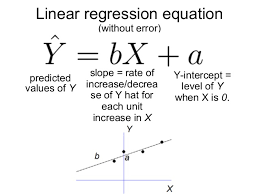

In [60]:
#print(net_y)
sq_x=(17000*square_x)-(np.square(sum_x))
sq_y=(17000*square_y)-(np.square(sum_y))
print(sq_x)
print(sq_y)


total_rooms    1.373296e+15
dtype: float64
population    3.807543e+14
dtype: float64


In [61]:
''''
import math
def square_root(num):
    return math.sqrt(num)
    '''


"'\nimport math\ndef square_root(num):\n    return math.sqrt(num)\n    "

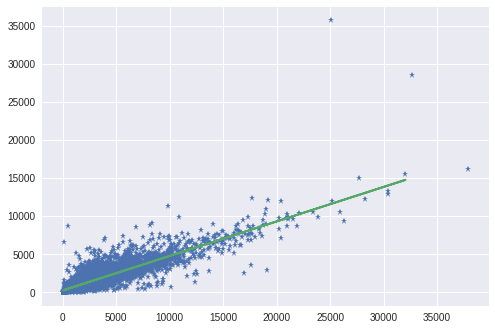

In [64]:
plt.plot(x,y,'*')
netx1=x[1:500]
nety1=net_y[1:500]
plt.plot(netx1,nety1,linewidth=2)

Plot of X with the Predicted Y values in the green line which shows that our predictive analysis is correct.

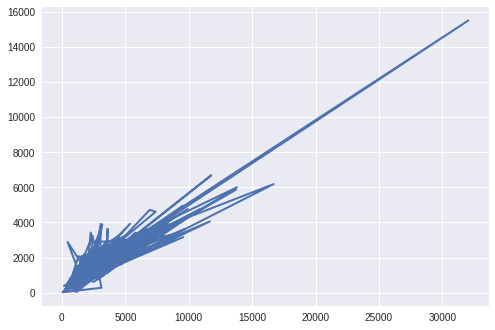

In [65]:
y_real=y[1:500]
plt.plot(netx1,y_real,linewidth=2)

Plot of X with the Acquired  DataSet Y values  

**STEP 7:**

The Graphical plots are noted for accuracy.

In [66]:
y.mean()

population    1429.573941
dtype: float64

In [67]:
net_y.mean()

total_rooms    1429.573941
dtype: float64

We move another step forward and compare the mean values of our predicted data and the real data.
In this exercise our predictions have given us almost no error in mean as we have used the exact formula based approach which may not always be the case.
Again I just reiterate that a dataset that is fit for univariate analysis must be the preferred choice,or at least a comparitive pair of colums may be chosen from a multivariable dataset.
# Thank You!